In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [3]:
import librosa
import librosa.display
import IPython.display as ipd

In [4]:
df = pd.read_csv("D:\\Project Working\\UrbanSound8k\\UrbanSound8K\\metadata\\UrbanSound8K.csv")
df.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [5]:
class_name = ["air_conditioner", "car_horn", "children_playing", "dog_bark", "drilling", "engine_idling", "gun_shot", "jackhammer", "siren", "street_music"]

In [6]:
df['class'].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

In [7]:
features = []
labels = []

def parser():
    # Function to load files and extract features
    for i in range(df.shape[0]):
        file_name = 'D:\\Project Working\\UrbanSound8k\\UrbanSound8K\\audio\\fold' + str(df["fold"][i]) + '/' + df["slice_file_name"][i]
        # Here kaiser_fast is a technique used for faster extraction
        data, sr = librosa.load(file_name, res_type='kaiser_fast') 
        mels = np.mean(librosa.feature.melspectrogram(y = data, sr = sr), axis=1)        
        features.append(mels)
        labels.append(df["classID"][i])

    return features, labels

In [8]:
x, y = parser()

C:\Pythondj\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1323
  return f(*args, **kwargs)
C:\Pythondj\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1103
  return f(*args, **kwargs)
C:\Pythondj\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1523
  return f(*args, **kwargs)


In [11]:
X = np.array(x)
Y = np.array(y)

print(X.shape)
print(Y.shape)

(8732, 128)
(8732,)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 1)

In [13]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6549, 128), (6549,), (2183, 128), (2183,))

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
forest = RandomForestClassifier()

# fit classifier to training set
forest.fit(X_train, y_train)

RandomForestClassifier()

In [19]:
y_pred=forest.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[231,   0,   0,   0,   0,   3,   0,   1,   0,   3],
       [  1,  85,   7,   4,   3,   2,   1,   5,   2,  11],
       [  2,   0, 202,   6,   3,   3,   0,   1,   5,  11],
       [  6,   1,  15, 196,   6,   2,   0,   1,  11,   8],
       [  1,   0,   6,   4, 230,   0,   0,  12,   0,   5],
       [  0,   0,   1,   0,   0, 244,   2,   1,   4,   3],
       [  6,   0,   4,   3,   7,   0,  70,   8,   0,   1],
       [  2,   0,   2,   0,   5,   0,   0, 252,   0,   5],
       [  0,   0,   5,   6,   0,   0,   0,   0, 209,   3],
       [  6,   0,  30,   6,   4,   2,   4,   2,   4, 186]], dtype=int64)

In [20]:
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 0.8727


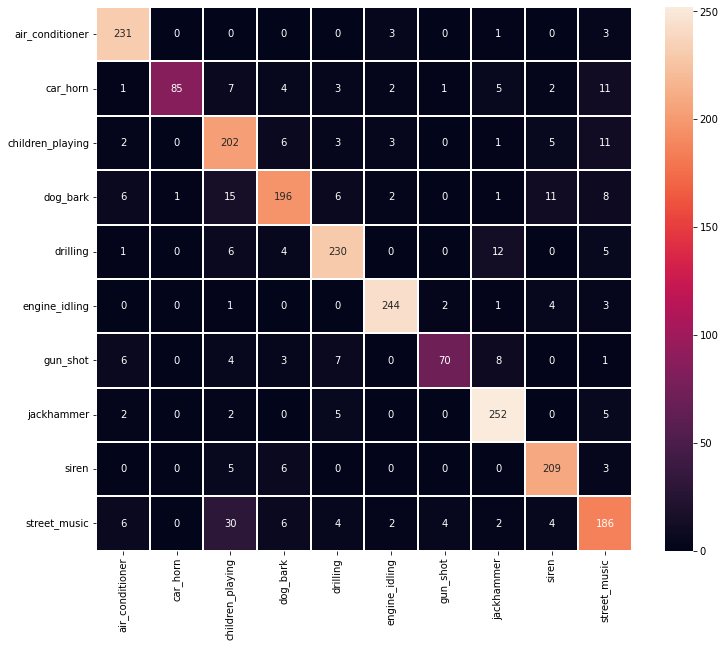

In [21]:
plt.figure(figsize = (12, 10))
sns.heatmap(confusion_matrix(y_test, y_pred), 
            annot = True, linewidths = 2, fmt="d", 
            xticklabels = class_name,
            yticklabels = class_name)
plt.show()

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       238
           1       0.99      0.70      0.82       121
           2       0.74      0.87      0.80       233
           3       0.87      0.80      0.83       246
           4       0.89      0.89      0.89       258
           5       0.95      0.96      0.95       255
           6       0.91      0.71      0.80        99
           7       0.89      0.95      0.92       266
           8       0.89      0.94      0.91       223
           9       0.79      0.76      0.78       244

    accuracy                           0.87      2183
   macro avg       0.88      0.85      0.86      2183
weighted avg       0.88      0.87      0.87      2183

